In [22]:
import matplotlib.pyplot as plt

import numpy

from pandas import read_csv, DataFrame

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [28]:
train = read_csv('train.csv')
test = read_csv('test.csv')

train_y = train['label']
train_X = train.drop('label', 1)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


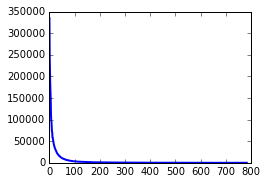

In [13]:
%matplotlib inline

pca = PCA()
pca.fit(train_X)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)

In [30]:
train_X_pca = pca.transform(train_X)[:, 0:60]
train_shuf = StratifiedShuffleSplit(train_y, n_iter = 10, test_size = .2, random_state = 123)

[[  661.59577975   699.31132821  -183.28203965 ...,   -71.56931773
     14.74515099     3.70484637]
 [-1701.4516848    360.5515562    501.80559391 ...,     4.15327152
     13.71515956   153.55050921]
 [  886.89443411   293.76578219   -67.15530988 ...,   -22.25700399
     95.36034548    60.73366811]
 ..., 
 [ -336.26998171  -950.01528029   168.60541437 ...,   -58.30134677
    -13.95718895   -67.465244  ]
 [ -327.39939154   -62.01608944  -697.53640055 ...,   -73.56034372
     42.53027528    62.89811467]
 [  364.24919987  -418.89302645   -62.89982318 ...,  -185.53590518
     53.48068676   -76.36594456]]


In [ ]:
parameters = {'kernel': ['rbf'], 
              'C': 10. ** numpy.arange(-5, 5, 1)
#               'degree': [2, 3],
#               'gamma': numpy.arange(1, 5, 1)
             }
clf = SVC()
gs = GridSearchCV(clf, parameters, n_jobs = 4, cv = train_shuf)
gs = gs.fit(train_X_pca, train_y)
print(gs.best_score_)
print(gs.best_estimator_)

In [ ]:
clf = gs.best_estimator_
print(clf)
clf.fit(train_X, train_y)

clf.predict(test).savetxt()
np.savetxt('out.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')